# MAP654I Practical Session 1

### Import and functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
def plot_temp_design(fig, ax):
    '''
    Add the labels of the temperature graph
    '''
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Temperature of the clusters')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    return fig, ax

### 1.3 Loading the data

**Q1 : Load the data with np.load("filename.npz") and store the different matrices in memory (for instance
in variables x1 for temper data and x2,y2 for digits data). For the digits dataset, it is better
to perform one simple pre-processing that scales the values between [0, 1] by dividing the data matrix
by 255.**

In [3]:
# Temperature dataset
temper = np.load("temper.npz")
data =  temper['data']
villes =  temper['villes']
varname =  temper['varname']

# Digit dataset
digits = np.load("digits.npz")
x = digits['x'] / 255
x_im = x.reshape((len(x), 28, 28))   #reshape to plot easily the 28*28 images
y_im  = digits['y']


ind_lat = np.argwhere(varname == 'Latitude')[0][0]
ind_lng = np.argwhere(varname == 'Longitude')[0][0]
lat = data[:, ind_lat]
lng = data[:, ind_lng]

**Q2 : Do a quick look at the data, compute the mean values for each variable and visualize it (with pl.plot
for the temperature signals and pl.imshow for the images in digits data).**

Q2.1 : Temperature dataset

In [4]:
villes

array(['Bordeaux', 'Brest', 'Clermont-Ferrand', 'Grenoble', 'Lille',
       'Lyon', 'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris',
       'Rennes', 'Strasbourg', 'Toulouse', 'Vichy'], dtype='<U16')

We are going to study the temperatures in 15 french cities, distributed throughout the country.
Let's see the values of these temperatures and their repartition.

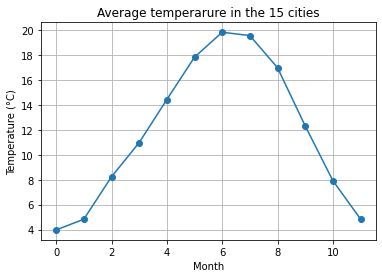

,January,February,March,April,May,June,July,August,September,October,November,December
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.973333,4.833333,8.233333,10.98000,14.433333,17.833333,19.833333,19.566667,16.986667,12.320000,7.926667,4.846667
std,2.007296,1.868409,1.529083,1.41482,1.504596,1.793507,2.128939,2.011988,1.848114,1.829988,1.803753,1.958449
min,0.400000,1.500000,5.600000,8.90000,11.600000,14.400000,15.600000,16.000000,14.700000,9.500000,4.900000,1.300000
25%,2.400000,3.350000,7.550000,10.00000,13.700000,17.150000,18.900000,18.450000,15.850000,11.300000,6.600000,3.450000
50%,4.700000,5.300000,7.800000,10.70000,14.300000,17.500000,19.400000,19.100000,16.400000,11.600000,7.800000,5.400000
75%,5.550000,6.200000,9.550000,12.20000,15.350000,19.000000,20.900000,20.950000,18.450000,13.550000,9.050000,6.350000
max,7.500000,8.500000,10.800000,13.30000,16.800000,20.800000,23.300000,22.800000,20.300000,16.000000,11.500000,8.200000


In [5]:
df = pd.DataFrame(data[:, :12], columns=varname[:12], index=villes)


plt.plot(data[:, :12].mean(axis=0), marker='o')
plt.title('Average temperarure in the 15 cities')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

df.describe()

The data are consistent : we can clearly see the seasonal phenomenon. In fact, the two hotest month are July and August, and the two coldest are December and January. The maximum standard deviation correspond two the month of July, which means that the temperature in France at this period vary a lot according to the city where you are. At the opposite, the temperatures in April tend to be quiet the same in France. 

In [6]:
temp_min = np.argwhere(data[:,:12] == data[:,:12].min())
ville_min = villes[temp_min[0][0]]
month_min = varname[temp_min[0][1]]
print(f'The min temperature corresponds to the city {ville_min} in {month_min}.')

temp_max = np.argwhere(data[:,:12] == data[:,:12].max())
ville_max = villes[temp_max[0][0]]
month_max = varname[temp_max[0][1]]
print(f'The max temperature corresponds to the city {ville_max} in {month_max}.')

The min temperature corresponds to the city Strasbourg in January.
The max temperature corresponds to the city Marseille in July.


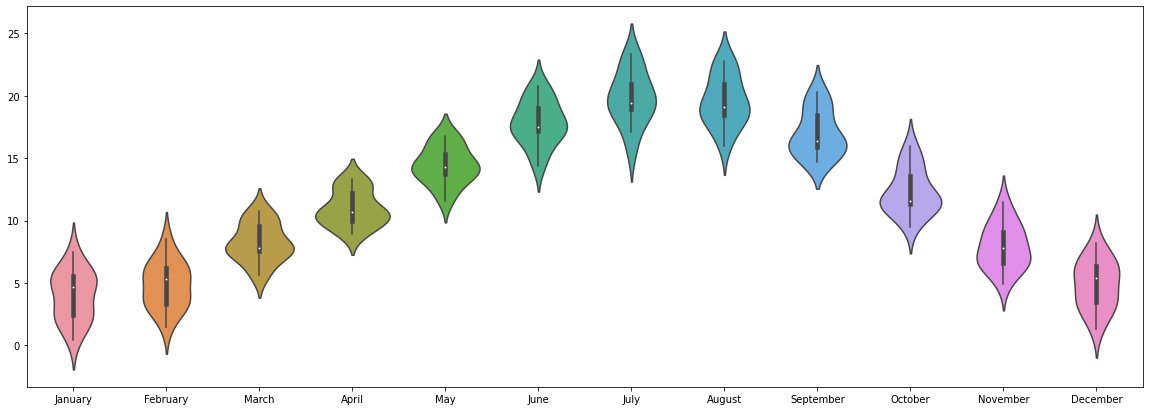

In [7]:
fig, ax = plt.subplots(figsize=(20,7))
sns.violinplot(data=df, ax=ax)
plt.show()

We see here that the variance of the temperature is low in Spring, and high in Summer and in Winter. 

In [8]:
data = data[:, :12]

Q2.2 : Digit dataset

In [9]:
np.unique(y_im, return_counts=True)

(array([1, 7, 8], dtype=uint8), array([1000, 1000, 1000]))

In the digit dataset, we can find images of handmades digits. There are 1000 instances of digit 1, 1000 of digit 7 and 1000 of 8. 

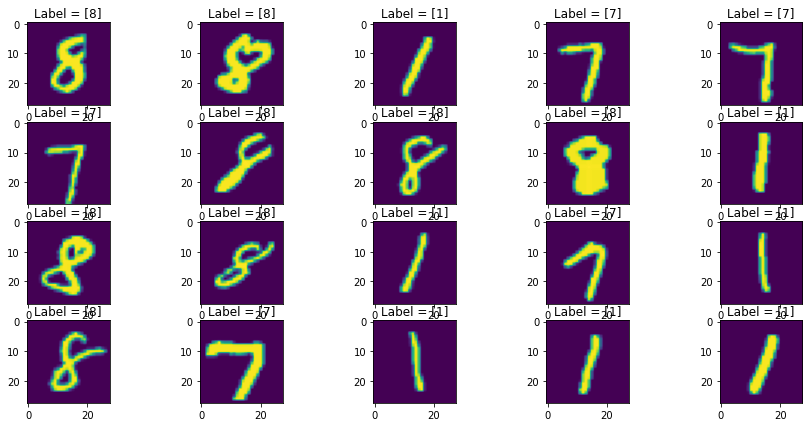

In [10]:
indexes = np.random.choice(np.arange(len(x_im)), size=20)

plt.figure(figsize=(15,7))
for i, ind in enumerate(indexes):
    plt.subplot(4,5,i+1)
    plt.imshow(x_im[ind])
    plt.title(f'Label = {y_im[ind]}')
plt.show()

We can see that it's not always easy  to distinguish the 1 and the 7. Only a part of the sevens are drawn with a bar.
It will be interesting to see how the clustering will react at these differences. 

**Q3. (Bonus) Reproduce the Figures above.**

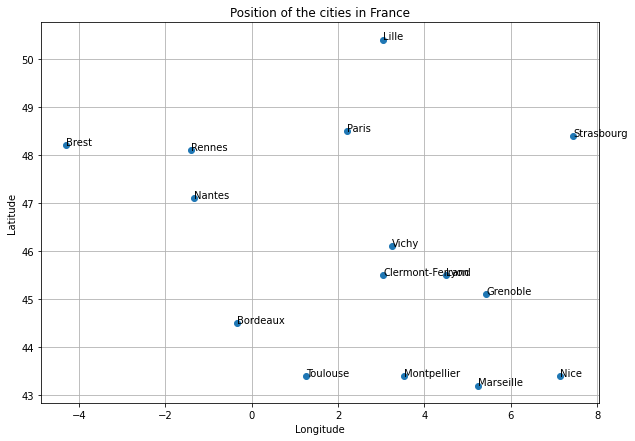

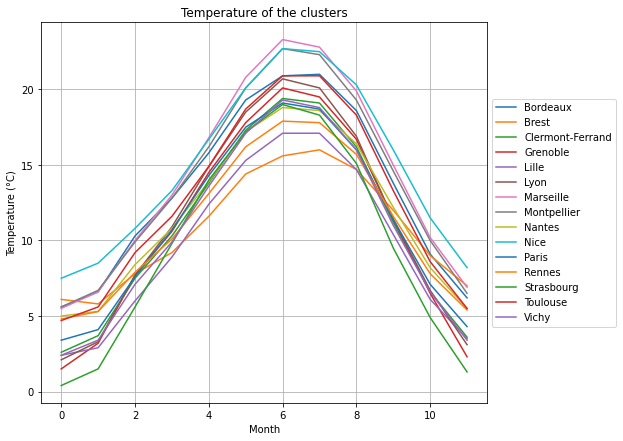

In [11]:
#Figure 1

def plot_cities(fig, ax, colors=None):
    ax.scatter(lng, lat, c=colors, cmap='tab10', vmax=9)
    for i, ville in enumerate(villes):
        ax.annotate(ville, (lng[i], lat[i]))
    plt.grid()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Position of the cities in France')
    return fig, ax

fig, ax = plt.subplots(figsize=(10,7))
plot_cities(fig, ax)

# Figure 2

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

for i in range(len(data)):
    plt.plot(data[i, :12], label=villes[i])
    
fig, ax = plot_temp_design(fig, ax)
plt.show()

## 2 Clustering

### 2.1 For both datasets

**Q1 : Perform K-means clustering on the data (K = 3, sklearn.cluster.Kmeans) and store the cluster
centroids and the estimated classes for all samples.**

In [12]:
data.shape

(15, 12)

In [13]:
from sklearn.cluster import KMeans

n_clusters_temp = 3

kmeans_temp = KMeans(n_clusters=n_clusters_temp, random_state=0).fit(data)
labels_temp = kmeans_temp.labels_
centroids_temp = kmeans_temp.cluster_centers_

n_clusters_digit = 3

kmeans_digit = KMeans(n_clusters=n_clusters_digit, random_state=0).fit(x)
labels_digit = kmeans_digit.labels_
centroids_digit = kmeans_digit.cluster_centers_

**Q2 : Plot the centroids and interpret them (how are the samples clustered? by class on digits? geographical
position for the cities?).**

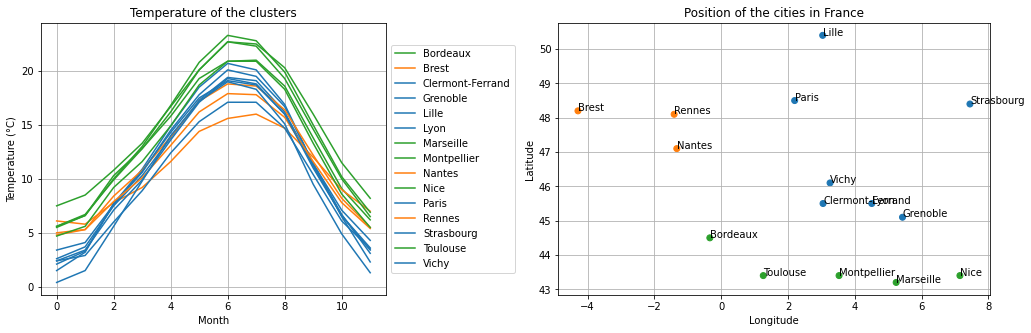

In [14]:
fig = plt.figure(figsize=(17,5))
ax = plt.subplot(121)
for i in range(len(data)):
    plt.plot(data[i], label=villes[i], color=f'C{labels_temp[i]}')

fig, ax = plot_temp_design(fig, ax)

ax = plt.subplot(122)
fig, ax = plot_cities(fig, ax, colors=labels_temp)

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> It's very satisfying because we can see clearly that the clustering done only with the temperatures shows us a logical geographical repartion of the cities.
    
We can identify : 
    
- a cluster **South** in green with Marseille, Nice, Montpellier, Toulouse and Bordeaux, where temperatures are highest, especially in summmer. (mediterranean climate)
    
- a cluster **"Bretagne"** or **Bretagne + Pays de la Loire""** because there is Nantes in it, with quiet high temperature during winter, but lower during the other months of the year. (oceanic climate) 

- a cluster **"North-East"** where the other cities that are particularly cold in winter. (continental climate) 

</div>

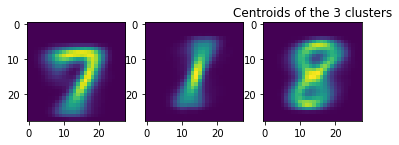

In [15]:
for i in range(n_clusters_digit):
    plt.subplot(1, 3, i+1)
    plt.imshow(centroids_digit[i].reshape(28,28))
plt.title('Centroids of the 3 clusters')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> This clustering is also satisfying because we can notice that the 3 centroids clearly corresponds to our labels (1, 7 and 8).
    
Those centroids are images averages so we can clearly see that there are not 'real images' : they are much more blurred than those of the dataset. 

</div>

**Q3 : Change the value of K and repeat the two previous steps. What are good values in your opinion and
why?**

A) Temperature dataset

Let's test K=2, K=4 and K=5. 

---------------------------------------------------------
Number of clusters : 2


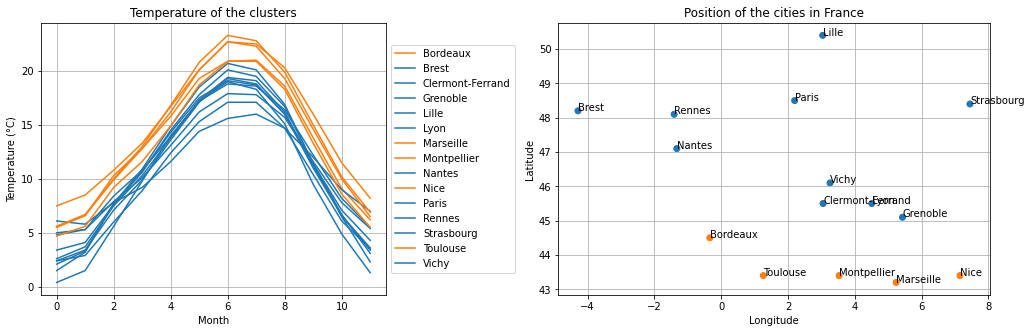


---------------------------------------------------------
Number of clusters : 4


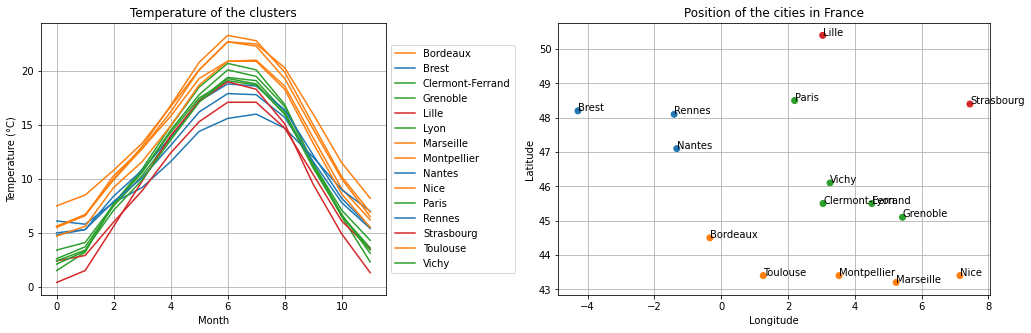


---------------------------------------------------------
Number of clusters : 5


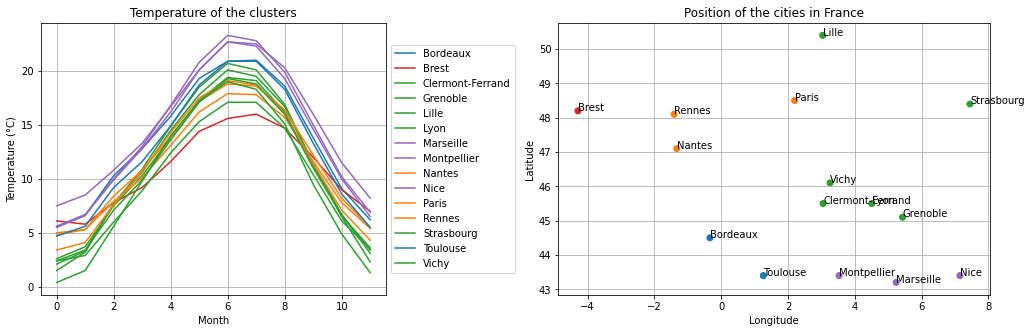

In [16]:
for n_clusters_temp in [2, 4, 5]:
    
    print('---------------------------------------------------------')
    print(f'Number of clusters : {n_clusters_temp}')

    kmeans_temp = KMeans(n_clusters=n_clusters_temp, random_state=0).fit(data)
    labels_temp = kmeans_temp.labels_
    centroids_temp = kmeans_temp.cluster_centers_

    fig = plt.figure(figsize=(17,5))
    ax = plt.subplot(121)
    for i in range(len(data)):
        plt.plot(data[i], label=villes[i], color=f'C{labels_temp[i]}')

    fig, ax = plot_temp_design(fig, ax)

    ax = plt.subplot(122)
    fig, ax = plot_cities(fig, ax, colors=labels_temp)
    plt.show()
    print()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> 
    
- With K=2, we have a distinction North/South. To my mind, we lost information compared to K=3, because we have no distinction cokntinental / oceanic. 
    
- With K=4, the cluster **North-East** become two clusters : Lille & Strasbourg and the rest. When we look at the temperature graphs, we can see that in fact, Lille & Stasbourg are a litlle colder than the other cities, but the seperation is not as obvious than for K=3. 
    
- With K=5, we still have a geographical consistency, but the interpretation becomes complex. Moreover, Brest forms a cluster of its own and the goal of this clustering is to find similarities between cities. 
    
**Conclusion : K=3 is the better value in my opionion**
</div>

B) Digits dataset

Let's test K=2 and K=4. 

---------------------------------------------------------
Number of clusters : 2


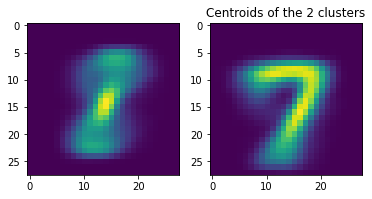

---------------------------------------------------------
Number of clusters : 4


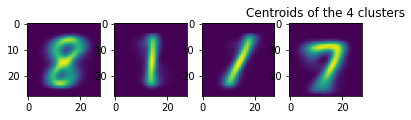

In [17]:
for n_clusters_digit in [2, 4]:
    
    print('---------------------------------------------------------')
    print(f'Number of clusters : {n_clusters_digit}')
    
    kmeans_digit = KMeans(n_clusters=n_clusters_digit, random_state=0).fit(x)
    labels_digit = kmeans_digit.labels_
    centroids_digit = kmeans_digit.cluster_centers_
    
    for i in range(n_clusters_digit):
        plt.subplot(1, n_clusters_digit, i+1)
        plt.imshow(centroids_digit[i].reshape(28,28))
    plt.title(f'Centroids of the {n_clusters_digit} clusters')
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> 
    
- With K=2, we have a cluster 7, and a cluster whose centroid is a mix of 1 and 8. It's obviously not satisyfing. 
    
- With K=4, we have a distinction between straight 1 and slanted 1. 
    
To my mind, K=3 is the better value in so far as we have the 3 different labels. It will enable us to measure the score of our clustering, and see if the 3 different type of labels are well separated by the KMeans. 

</div>

### 2.2 Temperature dataset

**Q1 : Look at the name of the cities in each clusters. Do the clustering make sens?**

**Q2 : Plot the cities with a scatterplot using their geographical position and using the estimated class as
color. Do the K-means clustering on temperature recover a geographical similarity between cities?
Why?**

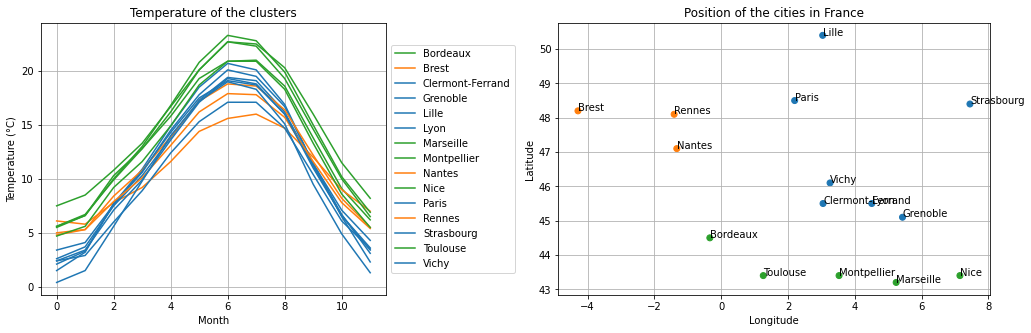

In [18]:
n_clusters_temp = 3
kmeans_temp = KMeans(n_clusters=n_clusters_temp, random_state=0).fit(data)
labels_temp = kmeans_temp.labels_
centroids_temp = kmeans_temp.cluster_centers_

fig = plt.figure(figsize=(17,5))
ax = plt.subplot(121)
for i in range(len(data)):
    plt.plot(data[i], label=villes[i], color=f'C{labels_temp[i]}')

fig, ax = plot_temp_design(fig, ax)
ax = plt.subplot(122)
fig, ax = plot_cities(fig, ax, colors=labels_temp)

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> 

As said in Q2.1.2, the clustering perfectly make sens. We find back 3 different type of climates : mediterranean, oceanic and continental.  

In green, we have the french cities that are well known for their high temperature, and that are very popular during the holidays.
 
In orange we have the 'Bretagne', with more rain and more wind. 

And in blue we have the cities particularly cold in winter, where we are used to seeing snow.

</div>


### 2.3 Digits dataset

**Q1 : Does the clusters resemble a true image from the dataset ? Could you tell if a cluster centroid is a
true image. Why ?**

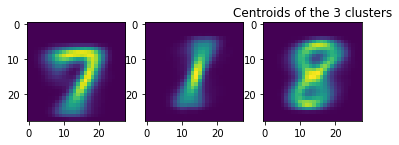

In [19]:
n_clusters_digit = 3
kmeans_digit = KMeans(n_clusters=n_clusters_digit, random_state=0).fit(x)
labels_digit = kmeans_digit.labels_
centroids_digit = kmeans_digit.cluster_centers_

for i in range(n_clusters_digit):
    plt.subplot(1, n_clusters_digit, i+1)
    plt.imshow(centroids_digit[i].reshape(28,28))
plt.title('Centroids of the 3 clusters')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b> 

The centroids don't look like real images. In fact, there are real images averages. This average creates non-smoothed edges, just like if we took a real image blurred, or we applyied a low-pass filter. 
    
However, they ressemble two a 7, a 1, and a 8. 

</div>


**Q2 : Plot the predicted labels (as a signal). Since the samples are ordered by class in the dataset, a clustering
respecting the true class should be piecewise constant. Is that the case?**

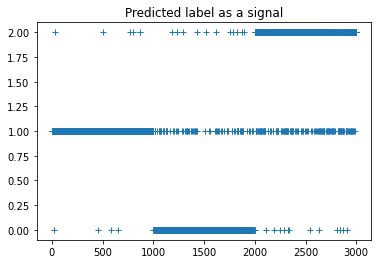

In [20]:
plt.title('Predicted label as a signal')
plt.plot(labels_digit,  linestyle = 'None', marker='+')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
The predicted labels is not exactly a piecewise constant, which means that some digit are misclassified. But on the graph, we can identify three 'quasi-constant' parts, which shows that most of the classification corresponds to the labels. 

We can also notice that the 1 is the most difficult digit to identify. Numerous 1 are in the cluster 7 or in the cluster 8. 
</div>

**Q3 : Compute the quality of the clustering using the ground truth labels (sklearn.metric.rand_score,
sklearn.metric.adjusted_rand_score).**

**Q4 : See the effect of the parameter K on the clustering score. What is the K that leads to the best score?
Why?**

Number of cluster : 1
The rand score is : 0.33
The adjusted rand score is : 0.00

Number of cluster : 2
The rand score is : 0.70
The adjusted rand score is : 0.42

Number of cluster : 3
The rand score is : 0.88
The adjusted rand score is : 0.74

Number of cluster : 4
The rand score is : 0.86
The adjusted rand score is : 0.67

Number of cluster : 5
The rand score is : 0.83
The adjusted rand score is : 0.57



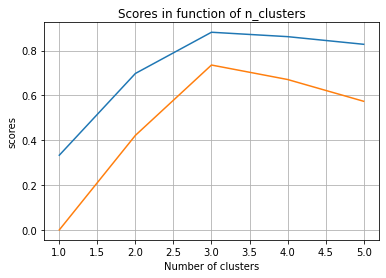

In [21]:
from sklearn.metrics import rand_score, adjusted_rand_score

res_rand, res_rand_adjusted = {}, {}

for n_clusters_digit in range(1,6):
    print(f'Number of cluster : {n_clusters_digit}')

    kmeans_digit = KMeans(n_clusters=n_clusters_digit, random_state=0).fit(x)
    labels_digit = kmeans_digit.labels_
    
    score_rand = rand_score(labels_digit, y_im.flatten())
    score_rand_adjusted = adjusted_rand_score(labels_digit, y_im.flatten())
    
    print(f'The rand score is : {score_rand:.2f}')
    print(f'The adjusted rand score is : {score_rand_adjusted:.2f}')
    
    res_rand[n_clusters_digit] = score_rand
    res_rand_adjusted[n_clusters_digit] = score_rand_adjusted

    print()
    
plt.title('Scores in function of n_clusters')
plt.plot(res_rand.keys(), res_rand.values(), label='Rand Index')
plt.plot(res_rand_adjusted.keys(), res_rand_adjusted.values(), label='Adjusted Rand Index')
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.grid()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
The scores compare the true labels to the predicted labels. As there are 3 true labels, it's logical that the best scores are attained for the value K=3. If we are more predicted labels than true labels, labelings that assign all classes members to the same clusters are not always be pure, so the score is penalized. 
</div>

## 3 Density estimation

### 3.1 For both datasets

**Q1 : Estimate a GMM density on the data with K = 2 for temperature and K = 3 for digits (sklearn.
mixture.GaussianMixture). Due to the relatively high dimensional data and small number of samples
we will estimate GMM with diagonal covariances (covariance_type=’diag’).**

**Q2 : Plot the centers of the Gaussian distributions in the mixture and interpret them.**

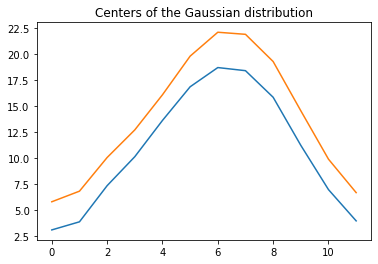

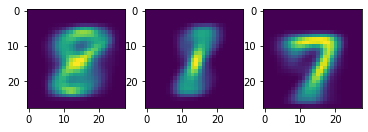

In [23]:
from sklearn.mixture import GaussianMixture

gm_temp = GaussianMixture(n_components=2, covariance_type='diag').fit(data)
centers_temp = gm_temp.means_

gm_digit = GaussianMixture(n_components=3, covariance_type='diag').fit(x)
centers_digit = gm_digit.means_

plt.title('Centers of the Gaussian distribution')
plt.plot(centers_temp[0])
plt.plot(centers_temp[1])
plt.show()

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(centers_digit[i].reshape(28,28))
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
**Digit dataset**
    
The Gaussian mixture algorithm has formed 3 gaussian in our 784 (28*28) dimensions space. 
When we look at the centroids of each cluster, we can recognize a 1, a 7 and a 8, as we had we K-means, and that's satisfying. 
Similarly with K-means, the centroids are not real images. They look like real digits blurred, because they're somewhere in the 784 dimension space close to real images. They seems to be even more blurred than the Kmeans centroids. They are not real images, but simply the most probable point of each diagonal component.
    
**Temperature dataset**
    
The separation induced by the gaussian mixture algorithm seems quiet simple. It has created two clusters, one with 'hot temperatures', plotted in orange on the graph, and one with 'cold temperatures', plotted in blue. 


</div>

**Q3 : Change the value of K and repeat the two previous steps. What are good values in your opinion and
why? Change the shape of the covariance, how well are they estimated on both datasets?**

---------------------------------------------------------
K = 2


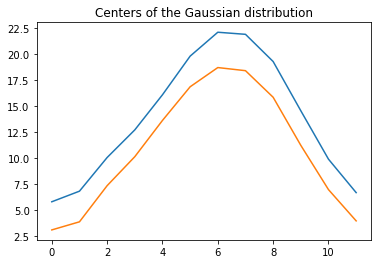

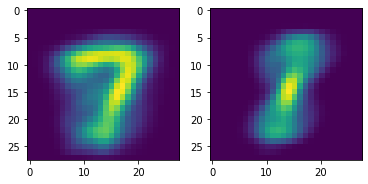

---------------------------------------------------------
K = 3


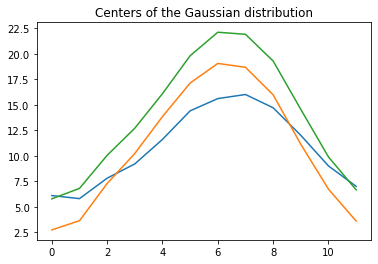

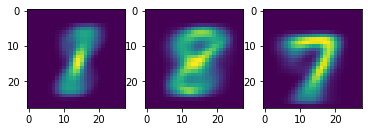

---------------------------------------------------------
K = 4


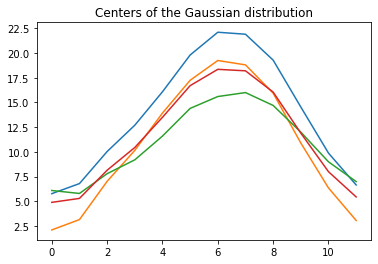

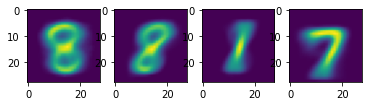

In [24]:
for K in [2, 3, 4]:
    
    print('---------------------------------------------------------')
    print(f'K = {K}')

    gm_temp = GaussianMixture(n_components=K, covariance_type='diag').fit(data)
    centers_temp = gm_temp.means_

    gm_digit = GaussianMixture(n_components=K, covariance_type='diag').fit(x)
    centers_digit = gm_digit.means_

    plt.title('Centers of the Gaussian distribution')
    for i in range(K):
        plt.plot(centers_temp[i])
    plt.show()

    for i in range(K):
        plt.subplot(1, K, i+1)
        plt.imshow(centers_digit[i].reshape(28,28))
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Concerning the values of K, I think that the best values are K=3 for both dataset. 
    
In fact, with the digit dataset, the 3 centers of the Gaussain distributions are clearly close from a 1, a 7, and a 8. 
When we take K=4, the last center seems to be a mix of a 1 and a 7. 

For the temperature dataset, K=3 is also the value that enable to have the best interpretability.
With this value, with have : 
    - one center "hot temperatures"
    - one "intermediate"
    - and one "cold"
    
With K=4, the centers in green and the one in red are not easily distinguishable. 

</div>

---------------------------------------------------------
covariance_type = spherical


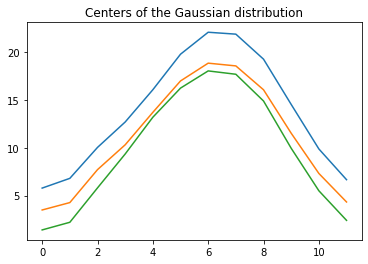

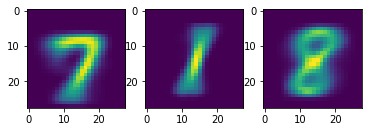

---------------------------------------------------------
covariance_type = full


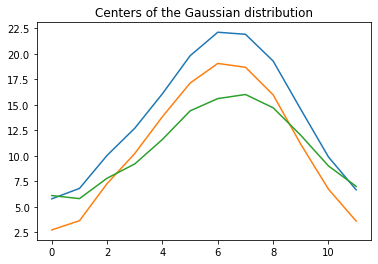

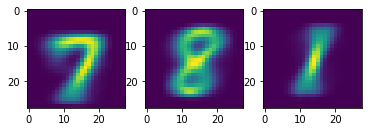

---------------------------------------------------------
covariance_type = tied


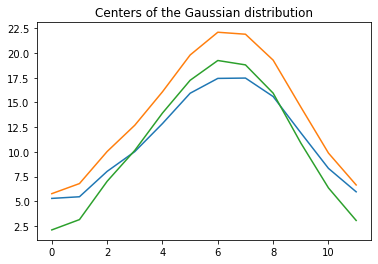

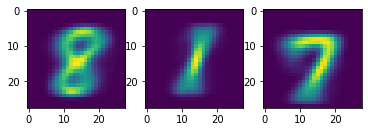

In [29]:
K = 3

for covariance_type in ['spherical', 'full', 'tied']:
    
    print('---------------------------------------------------------')
    print(f'Covariance_type = {covariance_type}')

    gm_temp = GaussianMixture(n_components=K, covariance_type=covariance_type).fit(data)
    centers_temp = gm_temp.means_

    gm_digit = GaussianMixture(n_components=K, covariance_type=covariance_type).fit(x)
    centers_digit = gm_digit.means_

    plt.title('Centers of the Gaussian distribution')
    for i in range(K):
        plt.plot(centers_temp[i])
    plt.show()

    for i in range(K):
        plt.subplot(1, K, i+1)
        plt.imshow(centers_digit[i].reshape(28,28))
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
We test other covariances : 'spherical', 'full' and 'tied'. 
We can't know exactly how the different samples are orgnized in their space so it's difficult to choose one type of covariance in advance.
    
But to my mind, for the temperature dataset, the better interpretability is obtained with the diagonal covariance (or spherical). 
    
For the digit temperature, the choice of the covariance don't seem to have a big impact. The centers of the Gaussian look very similare in the different cases. That may be because we work here in a space of high (784) dimensions.
</div>

**Q4 : Compute the log probability of the samples for the estimated density (model.score_samples(x)).
Recover the samples with the smallest score (probability) and plot them. They can be considered as
outliers for the distribution (least probable samples). Wan you see why?**

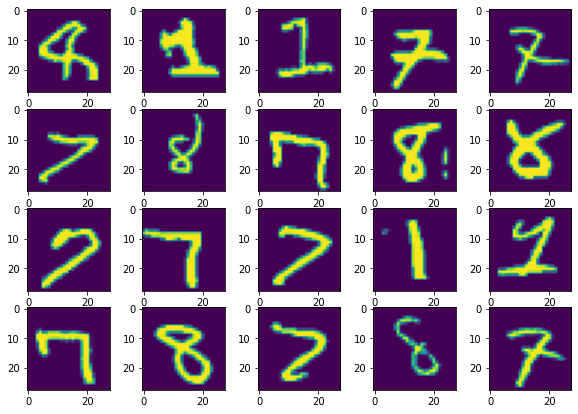

In [25]:
scores_digit = gm_digit.score_samples(x)
outliers_digits = np.argsort(scores_digit)[:20]

plt.figure(figsize=(10,7))
for i, ind in enumerate(outliers_digits):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_im[ind])
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Here are the 20 digits that have the smallest probability, that are the more far away from the centroids of the gaussians. 
For each of these 20 digits, we can find a 'default' of drawing, to justify that they can be considered as outliers. 
    
For example, we have several 7 with a bar on the middle. Our centroid corresponding to the cluster '7' do not have this bar. 
It's the same with the bar at the basis of the 1. 
Here, we have also, on the bottom left corner, a 8 that looks like a 4. We have also a 8, with a kind a of unvolontary stain at it right, a 8 that seems to not be finished, with a hole. 
Eventually, we have digits that could be one as it could be 7. It's almost impossible even for a human to know it. In our 784 dimension space, they must be between the centroid '1' and the centroid '7', but far away from them, and so we can consider them as outliers. 

</div>

['Toulouse' 'Nice' 'Lille']


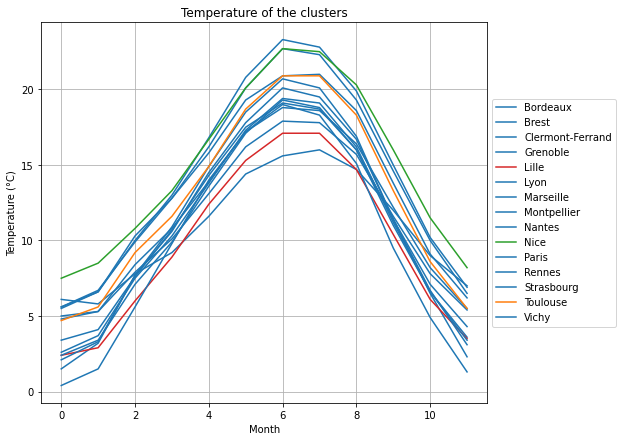

In [26]:
n_outliers = 3
scores_temp = gm_temp.score_samples(data)
outliers_temp = np.argsort(scores_temp)[:n_outliers]

print(villes[outliers_temp])

colors = np.array([0]*len(villes))
for i in range(n_outliers):
    colors[outliers_temp[i]] = i+1
    
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
for i in range(len(data)):
    plt.plot(data[i], label=villes[i], color=f'C{colors[i]}')

fig, ax = plot_temp_design(fig, ax)
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The 3 cities that have the lowest scores are Brest, Strasbourg and Toulouse. 
First of all, it's satisfying because these cities, especially Brest and Strasbourg, correspond to 'geographical extremes', 'geographical outliers'. 
Then, we can try to understand why their distribution of temperatures during the year ar globally different from the others. 
Concerning Brest, we can see with the orange curve that it's among the warmest city in Winter, and among the coldest in summer. 
For Strasbourg it's almost the opposite : it is the coldest city in winter, and among the warmest in summer. 
It is more difficult to understand why Toulouse is part of these outliers. The temperature in Toulouse are almost always near the average temperature of all cites. 
I guess Toulouse is perfectly between the two centroids of the gaussians, exactly as the digits that are between a 1 and a 7. 
That explains the low probability of Toulouse, the probabilities being high near the centroids. 

</div>

**Q5 : Digits dataset : Estimate the labels of the samples (model.predict) and compute the clustering rand
score. Is it better than Kmeans? Why?**

In [27]:
gm_labels_digit = gm_digit.predict(x)
score_rand = rand_score(gm_labels_digit, y_im.flatten())
score_rand_adjusted = adjusted_rand_score(gm_labels_digit, y_im.flatten())

print(score_rand)
print(score_rand_adjusted)

0.7427100144492609
0.3857842211598937


<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The scores obtained are worse than those obtained with Kmeans. 
The decision boudaries obtained with gaussian mixtures are diagonal here. Conversely, they are more spherical around the centroids with Kmeans. I guess that in this case, to separate correctly the 3 kind of digits, it's better to work with spherical boundaries, and that's why Kmeans scores are better. 

</div>

**Q6 : (Bonus) generate samples from the distribution (model.samples) and plot them. Could you differentiate
them from real data?**

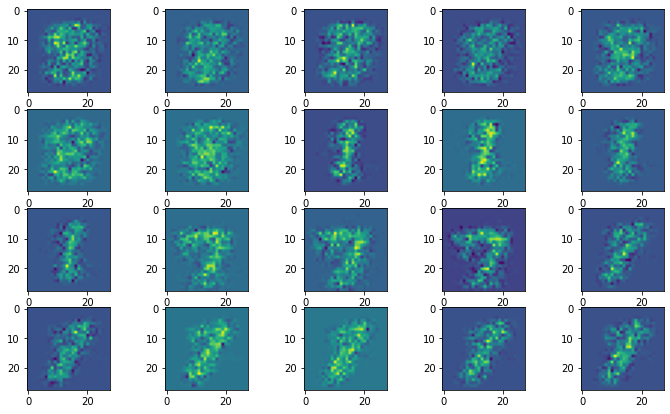

In [28]:
n_samples = 20
generated_samples = gm_digit.sample(n_samples)

plt.figure(figsize=(12,7))
for i in range(n_samples):
    plt.subplot(4, 5, i+1)
    plt.imshow(generated_samples[0][i].reshape(28,28))
    #plt.title(f'Label {generated_samples[0][i]}')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The samples obtained are clearly different from the real images. 
It appears to be very noisy images. We can very hardly try to guess the gaussian distribution they correspond to. 
They should be not to far from one of the gaussians centroid, because they are sampled according to the probability of the gaussians. So they are close from a centroid, but not in a good direction. For every of the 784 pixel, the pixel is a weighted average of the corresponding pixel of all the images. But, all the handmade digits are different. If we have a 7, and we take a random pixel between the 784, we can't know if it will be black or white. So for every sample, every pixel is not totally black or totally white, and above all, it's independent from its neigbour. That why the generated images are so noisy. 

</div>

## 4 Dimensionality reduction

### 4.1 Linear Projection : Principal Component Analysis

**Q1 : Compute the covariance matrix of the data and plot it as an image (np.cov(x.T)). Interpret the
structure of the covariance matrix using your knowledge of the data (relations between features).**

Temperature dataset

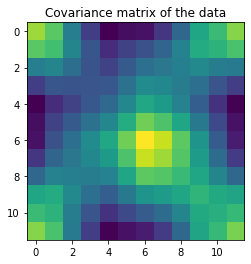

In [25]:
plt.title('Covariance matrix of the data')
plt.imshow(np.cov(data.T))
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

The covariance is high especially in the center of the image and on the corner. 
That is logical, because on the corners, we are calculating the covariance between months 0 and 11 that are close in the time. 
And in the center, we are calculating also the covariances of summer's months. The covariance is high : it means that when it's hot in a region in June, it's generally hot also in July and vice versa. Same for December and January for example. 
    
At the opposite, in the left, the top, the bottom and the right, the covariance between the monthes is less important. It's still positive, what's logical. In fact, it means that the hottes city in summer are generally also the hottest in winter (cf. Nice and Marseille). 
But the ranking during the cities in term of temperatures are not necessarily the same in winter and summer. Let's see Grenoble and Strasbourg for example, that are the coldest city in January, but cities rather hot in summer. 
    
    
To summarize :
    
- monthes close in time have logically higher covariances, especially those of summer and winter.
</div>

Digit dataset

In [26]:
(np.cov(x.T)).max()

0.20564059401918638

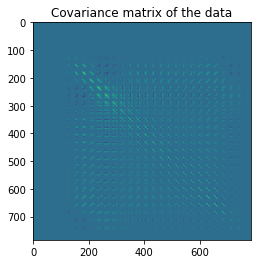

In [27]:
plt.title('Covariance matrix of the data')
plt.imshow(np.cov(x.T))
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

The covariances are low (the maximum of the matrix is 0.2)
The biggest one are on the diagonal. It means that when the 100th pixel is close to 255 for an image, the 100th pixels of other images is more probably close for 255 for other images, and vice-versa.
The pixel where something is drawn are quiet on the same places on the different images. The edges of the images are black, and the center of the images are lighter, whether it be for a 1, a 8 or a 7.
    
Moreover, we can observe a kind of structure on this image, like if we have a pattern (a cross ?) repeated in an matrix of 28 rows and 28 columns. It is like this because on each image, the value of a pixel is usually close to the one of its neighbors. 
For the pixel i, the pixel on the right is i+1, on the left i-1. But those on the top and on the bottom are i-28 and i+28.
That is responsible for the kind of texture that we can observe here.

</div>

**Q2 : Compute the PCA (keeping all dimensions with n_components=None) for the data and recover the
explained variance ratio (stored in model.explained_variance_ratio_) that is the proportion of
energy in each principal direction stored. Plot it and discuss the quantity of information preserved
when projecting on p = 2 dimensions.**

Temperature dataset

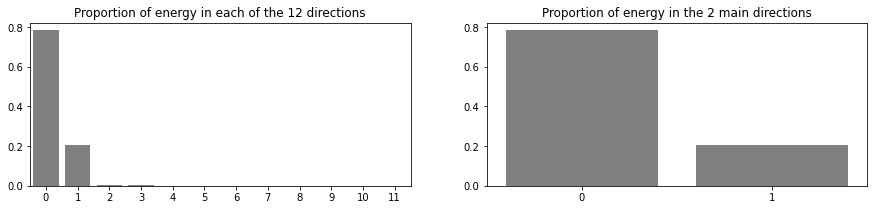

In [28]:
from sklearn.decomposition import PCA

plt.figure(figsize=(15,3))
pca = PCA(n_components=None)
pca.fit(data)
plt.subplot(121)
sns.barplot(x=np.arange(12), y=pca.explained_variance_ratio_, color='grey')
plt.title('Proportion of energy in each of the 12 directions')


pca = PCA(n_components=2)
pca.fit(data)
plt.subplot(122)
sns.barplot(x=np.arange(2), y=pca.explained_variance_ratio_, color='grey')
plt.title('Proportion of energy in the 2 main directions')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

All the energy is almost contained exclusively in the two first components. By doing PCA to restrict to 2 dimensions, we will almost loose no information, and that will be practical for our vizualisations (in 2D then).

</div>

Digit dataset

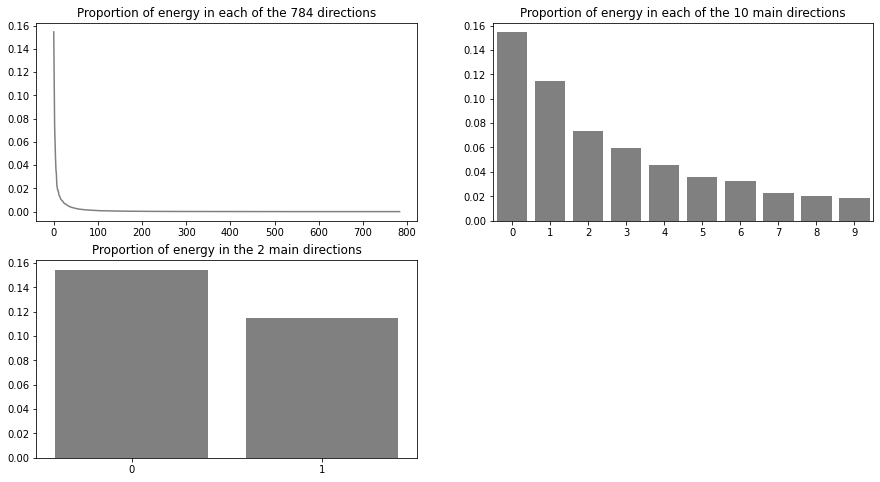

In [29]:
plt.figure(figsize=(15,8))
pca = PCA(n_components=None)
pca.fit(x)
plt.subplot(221)
plt.plot(pca.explained_variance_ratio_, color='grey')
plt.title('Proportion of energy in each of the 784 directions')

pca = PCA(n_components=None)
pca.fit(x)
plt.subplot(222)
sns.barplot(x=np.arange(10), y=pca.explained_variance_ratio_[:10], color='grey')
plt.title('Proportion of energy in each of the 10 main directions')


pca = PCA(n_components=2)
pca.fit(x)
plt.subplot(223)
sns.barplot(x=np.arange(2), y=pca.explained_variance_ratio_, color='grey')
plt.title('Proportion of energy in the 2 main directions')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

For the digit dataset, we have ~25% of the information in our two first directions. That's far more less than for the other dataset. And that's logical, because the initial dimension is 784. We go from d=784 to d=2 so it's normal to loose a lot of information. Therefore, the reconstruction of the samples will be more interesting. 
    
</div>

**Q3 : Project the samples in p = 2 dimensions and plot the projected samples (model.transform(x)). For
temperature data also plot the name of the city close to the sample (pl.text(x,y,’text’)) for a
better interpretation. For the digits dataset, color the samples with their class in the scatterplot.
Interpret the relations between the samples, what information is preserved and is it correlated to what
your know about the samples (geographic position or true class) ?**

Temperature dataset

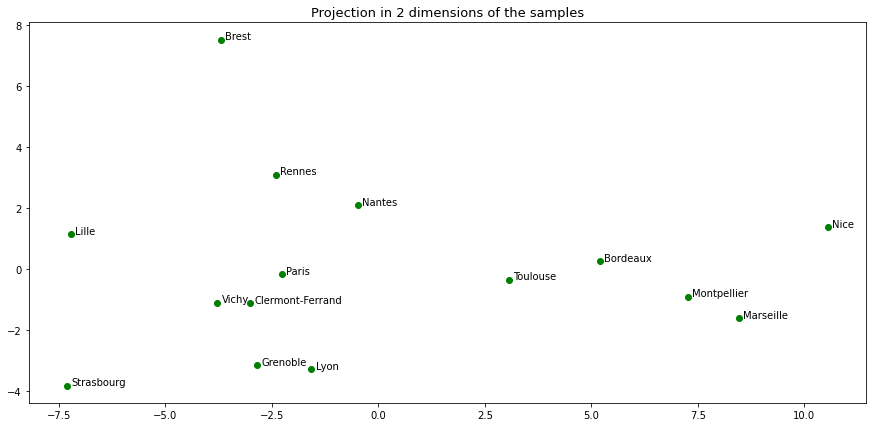

In [30]:
pca = PCA(n_components=2)
pca.fit(data)
data_projected = pca.transform(data)
plt.figure(figsize=(15,7))

for i in range(len(data_projected)):
    plt.scatter(data_projected[i][0], data_projected[i][1], color='green')
    plt.text(x=data_projected[i][0]+0.1, y=data_projected[i][1], s=villes[i])
plt.title('Projection in 2 dimensions of the samples', fontsize=13)
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

When we project our samples in 2D, after the PCA, it's very impressive : we almost recover the geographical positions of the cities on a french map. 
We have all the south cities on the left, the north citites on the right. Strasbourg is opposed to Brest and Lille at the opposite of Nice. This plot is very impressive. 
    
Not only we have lose no information (as seen in the previous question), but we even have a very interesting interpretation by going from dimension 12 to dimension 2. 
    
Also, we recover our cluster 'South', 'Bretagne' and 'North' visually. 

</div>

Digit dataset

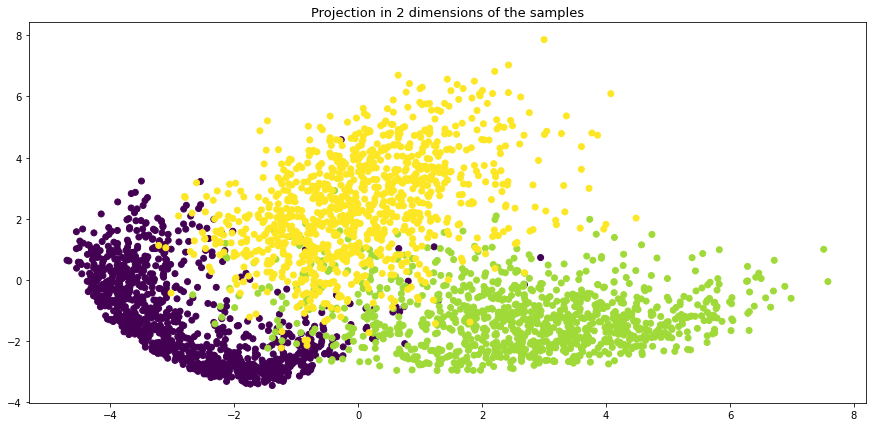

In [31]:
pca = PCA(n_components=2)
pca.fit(x)
x_projected = pca.transform(x)

plt.figure(figsize=(15,7))
plt.scatter(x_projected[:,0], x_projected[:,1], c=y_im)   
plt.title('Projection in 2 dimensions of the samples', fontsize=13)
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

Even he we have lost information as seen in the previous question, the graph shows when we go from dim 784 to dim 2, the organization of the data in space is still extremely coherent. In the R^2 space, the ones are near the 1, and the same is true for the 7 and the 8. We have not lose as many info than I thought. 

</div>

**Q4 : Get the the two first principal directions (model.components_) from the model. Plot them and
interpret them. What is the impact of moving along those direction in the original space?**

Temperature dataset

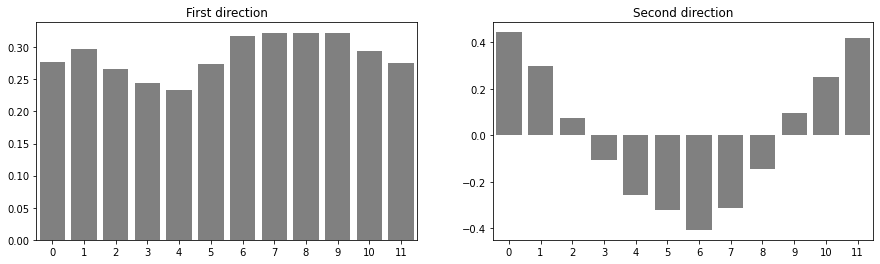

In [32]:
pca = PCA(n_components=2)
pca.fit(data)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('First direction')
sns.barplot(x=np.arange(12), y=pca.components_[0], color='grey')
plt.subplot(122)
plt.title('Second direction')
sns.barplot(x=np.arange(12), y=pca.components_[1], color='grey')
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

I interpret this two direction like this : 
    
- first direction : average temperature. It is a weighted average of the temperature over all monthes. 
- second direction : difference between winter and summer. We take the temperature of winter positively, and those of summer negatively. 
  
With only this two information we can retrieve a city and it temperature over each month. 
    
</div>

Digit dataset

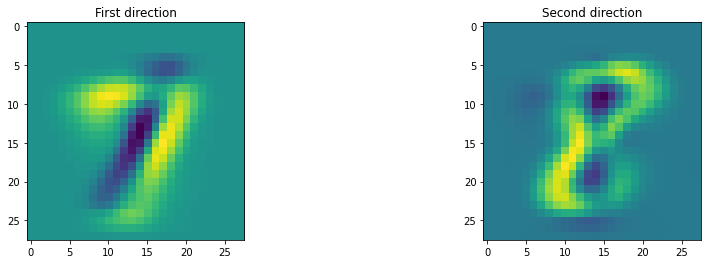

In [35]:
pca = PCA(n_components=2)
pca.fit(x)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title('First direction')
plt.imshow(pca.components_[0].reshape(28, 28))
plt.subplot(122)
plt.title('Second direction')
plt.imshow(pca.components_[1].reshape(28, 28))
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

The first direction represents 'a seven minus a one'. 

The second direction represents 'a 8 minus {1,7}'. 
    
With this two direction, we can distinguish the 3 digits. 
    
Let's call d1 and d2 these two directions, and let's say that we represent a digit by a1*d1 + a2*d2 where a1 and a2 are real numbers. 
    
- For the 1, we will surely have a1<0 and a2<0. 
- For the 7, we will surely have a1>0 and a2<0.
- For the 8, we will surely have a1~0 and a2>0.                                            

</div>

**Q5 : Reconstruct the data from the projected samples (model.inverse_transform(xp)) for different subspace
dimension p. For a few samples in the dataset plot, the sample and its reconstruction. Is it still
recognizable? Look at the impact of p on the quality of reconstruction.**

Temperature dataset

In [36]:
villes_caract = ['Marseille', 'Lille', 'Brest']
index_mars = np.argwhere(villes=='Marseille')[0][0]
index_lille = np.argwhere(villes=='Lille')[0][0]
index_brest = np.argwhere(villes=='Brest')[0][0]

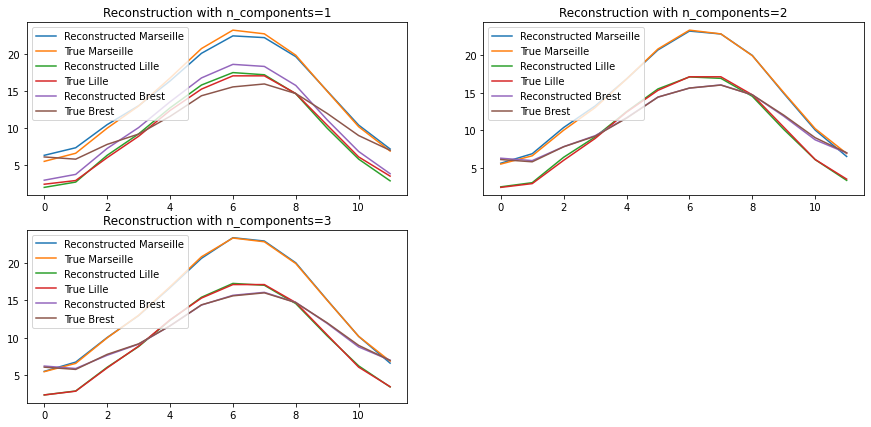

In [37]:
plt.figure(figsize=(15, 7))
for n_components in [1, 2, 3]:
    plt.subplot(int(f'22{n_components}'))
    plt.title(f'Reconstruction with n_components={n_components}')
    pca = PCA(n_components=n_components)
    pca.fit(data)

    data_projected = pca.transform(data)
    data_reconstructed = pca.inverse_transform(data_projected)

    for i, ind in enumerate([index_mars, index_lille, index_brest]):
        plt.plot(data_reconstructed[ind], label=f'Reconstructed {villes_caract[i]}')
        plt.plot(data[ind], label=f'True {villes_caract[i]}')

    plt.legend(loc='upper left')

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

For p = 1 we recover the same aspect and we can recognize which reconstructed sample correspond to which city. 
Logically, when p grows up, we add info and the reconstruction become more easy. 
For p>=2, the reconstruction is almost perfect.
</div>

Digit dataset

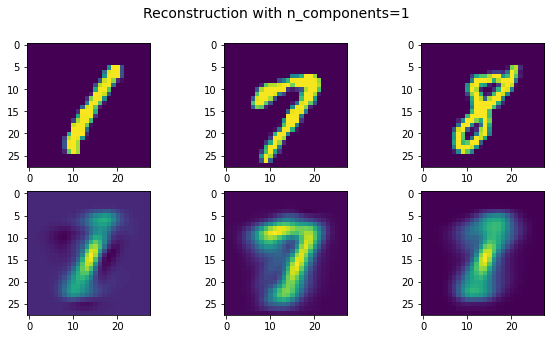

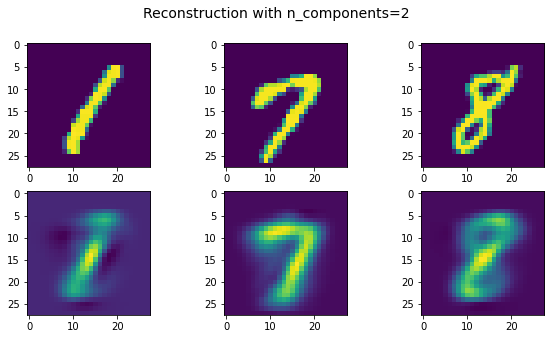

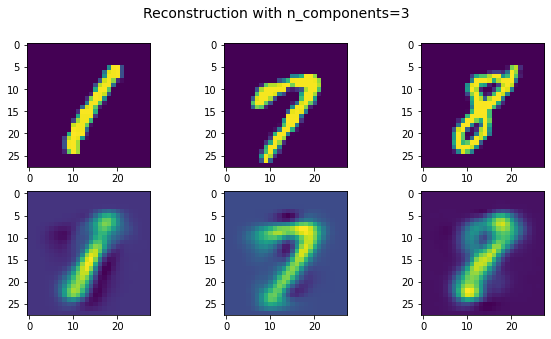

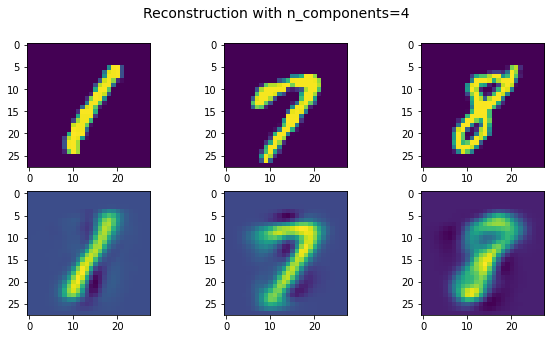

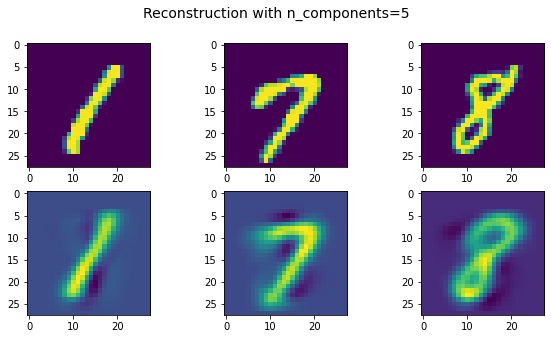

In [38]:
for n_components in [1, 2, 3, 4, 5]:
    pca = PCA(n_components=n_components)
    pca.fit(x)
    x_projected = pca.transform(x)
    x_reconstructed = pca.inverse_transform(x_projected)

    plt.figure(figsize=(10,5))
    for i, ind in enumerate([0, 1000, 2000]):
        plt.subplot(int(f'23{i+1}'))
        plt.imshow(x[ind].reshape(28,28))
        plt.subplot(int(f'23{i+4}'))
        plt.imshow(x_reconstructed[ind].reshape(28,28))
    plt.suptitle(f'Reconstruction with n_components={n_components}', fontsize=14)
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

We try to reconstruct a 1, a 7 and a 8. 
Logically, when p grows up, the reconstruction is more easy. 
It is visible on the images, especially for the 1 and the 7. 
In fact, we have less blurr for p=4 than for p=1, for the 1 and the 7 digit. 
    
The 8 begin to be distinguishable from p=5.
    
To have a perfect reconstruction, we need to have even more directions, (a bigger value for p).

</div>

**Q6 : (Bonus) Estimate and visualize other linear modeling methods such as NMF that can be used on
positive of the data.**

In [35]:
#TO COMPLETE

### 4.2 Manifold Learning : TSNE

**Q1 : Compute the TSNE embedding of the data for in p = 2 for both datasets (sklearn.manifold.TSNE).**

In [40]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2).fit_transform(data)

In [41]:
x_embedded = TSNE(n_components=2).fit_transform(x)

**Q2 : Project the samples and plot them. For temperature data also plot the name of the city close to
the sample (pl.text(x,y,’text’)). For the digits dataset, color the samples with their class in the
scatterplot.**

Temperature dataset

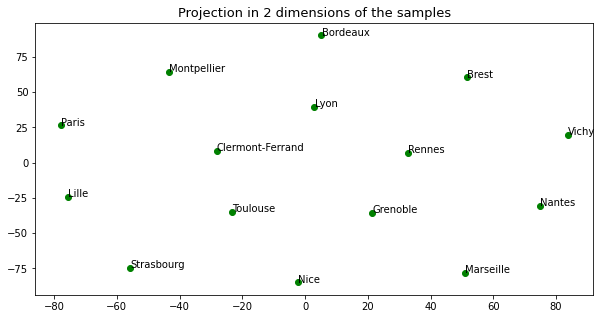

In [249]:
plt.figure(figsize=(10,5))
for i in range(len(data_projected)):
    plt.scatter(data_embedded[i][0], data_embedded[i][1], color='green')
    plt.text(x=data_embedded[i][0]+0.1, y=data_embedded[i][1], s=villes[i])
plt.title('Projection in 2 dimensions of the samples', fontsize=13)
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

For the temperature value, the default value for the perplexity is probably to high. In fact, the distribution of the points is almost uniform. We can't recognize any cluster that we had with the previous unsupervised learning methods of this TP.
</div>

Digit dataset

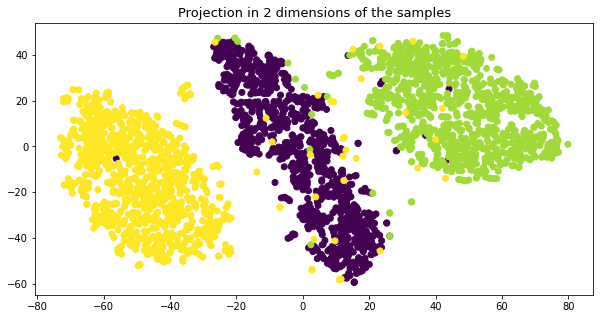

In [251]:
plt.figure(figsize=(10, 5))
plt.scatter(x_embedded[:,0], x_embedded[:,1], c=y_im)   
plt.title('Projection in 2 dimensions of the samples', fontsize=13)
plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

On the other hand, for the digit dataset, the default value of the perplexity seems to be good. 
In fact, with only to directions over 784, we have suceeded to separate the different digits. The probability distributions are well preserved. 
</div>

**Q3 : What is the effect of the perplexity parameter? Does the embedding recover geographical relations
for the temperature dataset? Is the embedding more discriminant in 2D for the digits dataset than
the ACP?**

perplexity = 30 per default

'The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity.'

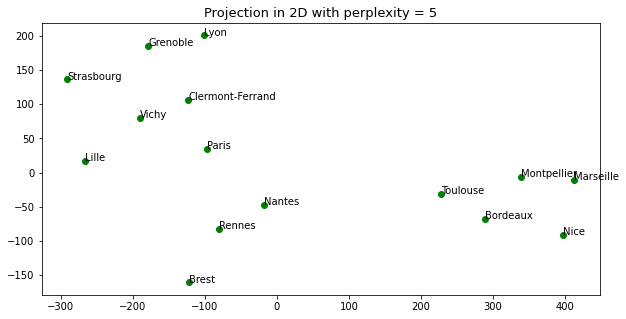

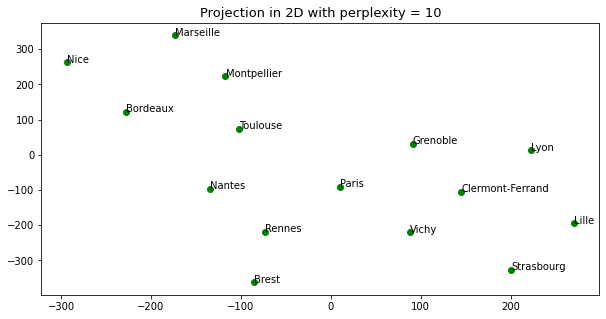

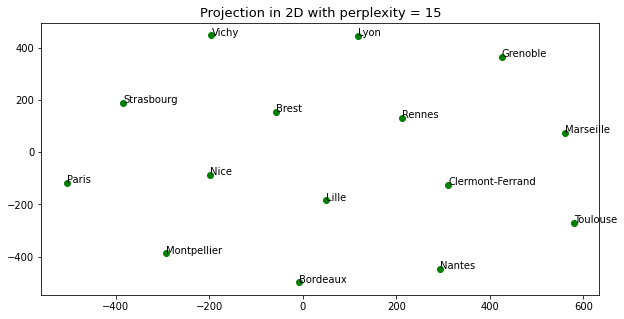

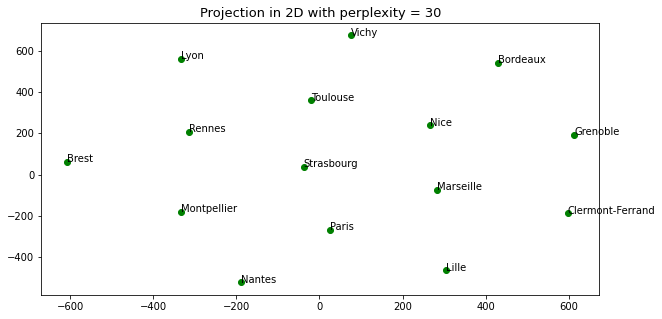

In [253]:
for perplexity in [5, 10, 15, 30]:
    data_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(data)
    plt.figure(figsize=(10,5))
    for i in range(len(data_projected)):
        plt.scatter(data_embedded[i][0], data_embedded[i][1], color='green')
        plt.text(x=data_embedded[i][0]+0.1, y=data_embedded[i][1], s=villes[i])
    plt.title(f'Projection in 2D with perplexity = {perplexity}', fontsize=13)
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

With perplexity=5, ie smallest bandwith to consider that thow samples are neighbors, we recover a spatial consistency with the separtion 'South', 'Bretagne' and 'North-East'. 
When p grows up, we find again a quasi-uniform distribution and we lose information.
</div>

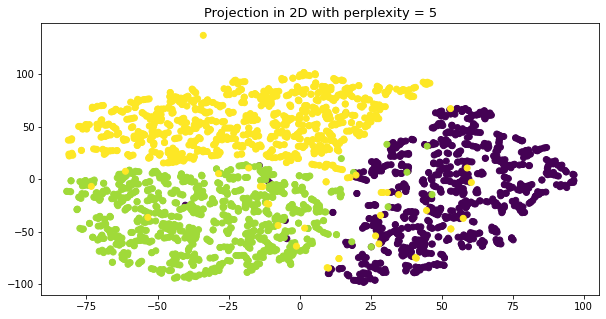

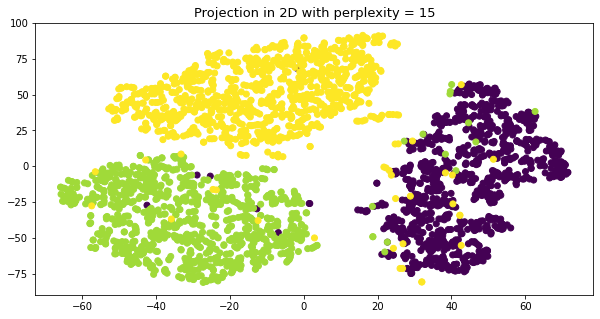

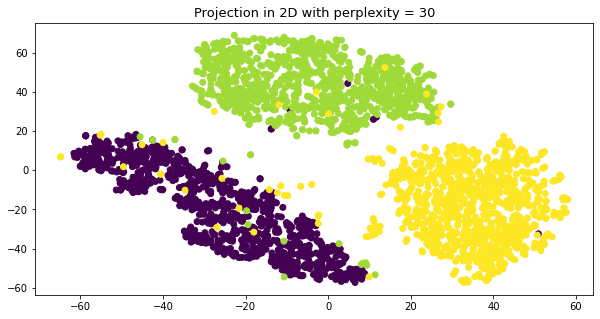

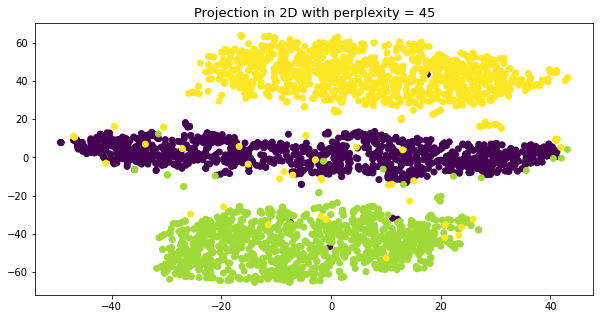

In [47]:
for perplexity in [5, 15, 30, 45]:
    x_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(x)
    plt.figure(figsize=(10,5))
    plt.scatter(x_embedded[:,0], x_embedded[:,1], c=y_im)   
    plt.title(f'Projection in 2D with perplexity = {perplexity}', fontsize=13)
    plt.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

The distribution of the digit 1 is in purple, the one of the 7 in green, and finally, the one of the 8 in yellow. 
For the perplexity = 30, we can see that :
    - the 7 and the 8 classes seems to have spherical distributions
    - the 1 seems to have a more elliptic distributions
    
For p = 5, the form of the distributions are more weird. It confirms the fact that by giving a too small perplexity to TSNE, we begin to have forms that should not exist : they don't represent the reality of the distributions. 
    
</div>

**The end of the report must contain a personal discussion about the session (what was hard to understand
and implement, how you would do it next time, what was new, discussion of relation with the course, personal
discussion about how to use these tools in a professional setting, . . . ).**

<div class="alert alert-block alert-success">
<b>Conclusion:</b>

1) What was hard to understand ?
    
This practical session is clear so there are not a lot of things that I found hard to understand. However, to me, it was harder to work with images than with numerical data. For example, when we want to study the two main directions given by the PCA, it was not evident for me to plot theses directions as images. I first plotted them as a 1D-signal and thus, it was impossible to get any interpretation. I first thought that working with images makes it harder to interpret things, whereas, when you told me to plot directions as images rather than 1D-signals, I understood directly that images are in fact very interpretable. 
    
Also, working with different subplots on a same figure was not easy at the very beginning.

    
    
2) What was new ? + personal discussion about how to use these tools in a professional setting
    
I had already worked on algorithms such as Kmeans and PCA, but not with this level of details. On the other hand, TSNE and GMM where totally new to me, for the theory and the implementation. It was interesting to discover new algorithms, but was the most rewarding to me was the part 'Interpretation'. 
When you are a data scientits, I find it rather easy to implement an algorithm. 
You have a dataset, you want to create clusters, you do an import sklearn and a .fit and it's over. But that's not the good way to do it. I understood with this TP that knowing his data is very important (distribution, mean, variance, different shapes, ...). Also interpret what has been done is meaningful, and that is where I learnt more. 
I find it very impressive sometimes, especially whis the PCA, when, by reducing from 12 to 2 directions, we find almost exaclty the French map. Also, intepret the two directions of projections (avg temperature, and difference winter - summer) was very meaningful.
I think in a professional setting, we a client comes to a data scientists with a big dataset, we wants to have this kind of interpretation in addition to the results of the algorithms. 
Understand the algorithms and not letting them being 'black boxes' will be important in our future work. 
    
I think that the combo 'Course slides + Sklearn' is perfect for that. On the one hand, we have the theory of each algo, it parameters and it limits, available in a few slides. And on the other hand, its implementation on sklearn webpages. 
    
Reading and learning the course slides will be very useful to prepare future interviews of data scientist job. 
    

    
</div>